# Visualization of Data

## Instructions

### Visualization of the german credit data
You need to **work collaboratively** to finish this task. The objective is
- To gain insights from the data via visualization and
- Identify groups of good credit risk and bad credit risk (i.e. good loan takers and bad loan takers).

This is the continuation of the previous task. You can find the data `german_credit_data.csv` saved under the [data](../data) folder.<br>
NOTE: **You can check the reference website**    

You already answered the questions in the previous task. Now we want to **visualize the finding below**.

- What are mean age, mean credit amount, and duration?
- What are the major three purpose of loan?
- What is the majoriry loan taker? Male of female?<br>

In order to gain the insights required, you may ask youself<br>
For both good loan and bad loan takers:
- What is the distrubition of purpose of loan?
- What is the distribution of age?
- What is the distribution of and amount of loan?
- Is there any correlation between the purpose of loan and gender?
- Is there any correlation between the purpose of loan and age group?
- ...etc.

You can think of any other method to analyse the data. As long as you can visualize it and help to gain insights on the good and bad loan takers.

Note:
- You are **ALLOWED** to import other library or package
- You can write you own functions
- Your answers should be readable with approprate comments
- You can refer to [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you are not familar with Markdown

### Reference
This dataset was sourced from Kaggle: https://www.kaggle.com/uciml/german-credit

The original source is: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

## Import libraries 

In [1]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Summary:

### For general customer:
- The majority of loan taker is from age 20-40
- Men are more willing to take loan
- Most of the loan taker have skilled job
- Most of the loan are small, the amount of loan is generally less than $3,500
- Loaners mostly have little to moderate saving
- Women tend to loan around 22-30, but men is a bit later around 25-35
- Women tend to make smaller loan than men

### For good and bad loan taker:
- Good loan taker: own a house/ rich or quite rich on saving
- Bad loan taker: Does not own a house/ no much saving


    - The propotion of male to be a good loan taker is much higher than female.
    - Those loans which the purpose are consumer goods, are more likely to be issued by good loan taker.
    - Small amount of loan are more likely to be issued by good loan takers.

## Discussion: 
- Regarding Gender and Age, the reason might be people get married and buy houses at around 30, and the loan would probably make by the husband. Hence, that might be the reason that women are more likely to loan in early 20 and less likely to be good loan taker.

## Please perform your tasks below and answer the questions

In [2]:
# Load the dataset
loan_df = pd.read_csv("~/Documents/GitHub/brickmovers_explor_and_vis/data/german_credit_data.csv",index_col=0)

In [14]:
loan_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Duration_gt20
0,67,male,2,own,NaN,little,1169,6,radio/TV,False
1,22,female,2,own,little,moderate,5951,48,radio/TV,True
2,49,male,1,own,little,NaN,2096,12,education,False
3,45,male,2,free,little,little,7882,42,furniture/equipment,True
4,53,male,2,free,little,little,4870,24,car,True


Text(0.5, 1.0, 'Histogram of The Age of Loaner')

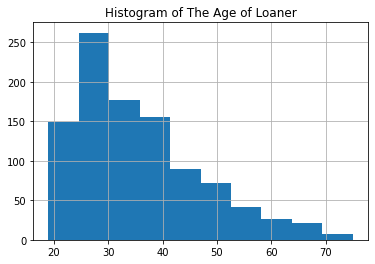

In [82]:
loan_df['Age'].hist()
plt.title("Histogram of The Age of Loaner")

- The majority of loan is issued for people from age 20-40

In [84]:
print("The count of the male and female loaner are:")
print(loan_df['Sex'].value_counts())

The count of the male and female loaner are:
male      690
female    310
Name: Sex, dtype: int64


- Men are more willing to take loan

In [86]:
print("The count of loaner's job are:")
print(loan_df['Job'].value_counts())

The count of loaner's job are:
2    630
1    200
3    148
0     22
Name: Job, dtype: int64


- Most of the have skilled job, but only ~20% are unkilled

In [88]:
print("The count of housing status of loaners:")
print(loan_df['Housing'].value_counts())

The count of housing status of loaners:
own     713
rent    179
free    108
Name: Housing, dtype: int64


- Loaners mostly own a house

In [89]:
print("The saving status of loaners:")
print(loan_df['Saving accounts'].value_counts())

The saving status of loaners:
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


- Loaners mostly have little to moderate saving

The credit amount distribution:
AxesSubplot(0.125,0.125;0.775x0.755)


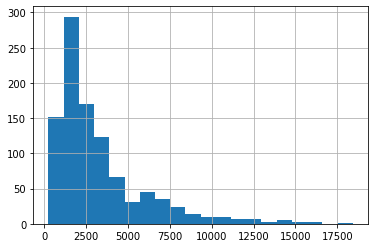

In [90]:
print("The credit amount distribution:")
print(loan_df['Credit amount'].hist(bins = 20))

- most of the loan are small, the amount of loan is normally less than $3500

In [92]:
print("Count of each purpose of the loan:")
print(loan_df['Purpose'].value_counts())

Count of each purpose of the loan:
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


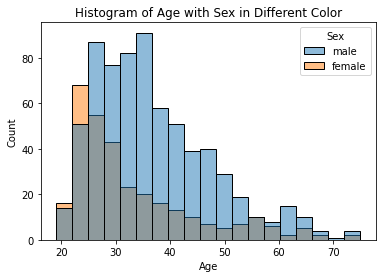

In [95]:
sns.histplot(data = loan_df,x = 'Age',hue = 'Sex')
plt.title("Histogram of Age with Sex in Different Color")
plt.show()

- Women tend to loan around 22-30, but men is a bit later around 25-35

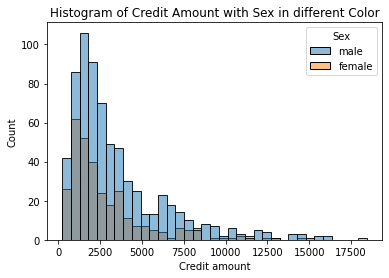

In [96]:
sns.histplot(data = loan_df,x = 'Credit amount',hue = 'Sex')
plt.title("Histogram of Credit Amount with Sex in different Color")
plt.show()

- Men tend to make bigger loan compare to women

## After some data exploration, we identify the two loan takers as the following
    - Good loan taker: own a house/ rich or quite rich on saving
    - Bad loan taker: Does not own a house/ no much saving

In [32]:
loan_df['good_loan_taker'] = (loan_df['Housing']=='own')|(loan_df['Saving accounts']=='quite rich')|(loan_df['Saving accounts']=='rich')


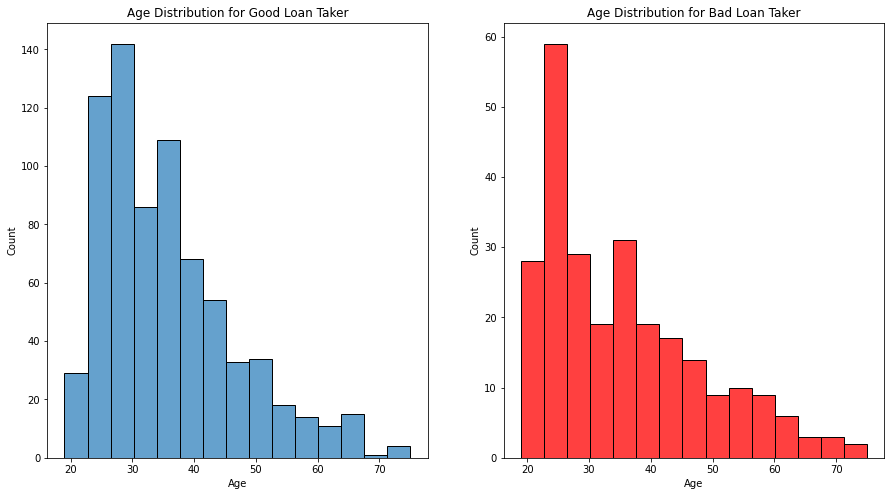

In [97]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = [15,8])
sns.histplot(data = loan_df[loan_df['good_loan_taker']==True],x = 'Age',bins = 15,ax=ax1,color='#3182bd')
sns.histplot(data = loan_df[loan_df['good_loan_taker']==False],x = 'Age',bins = 15,ax=ax2,color='red')
ax1.set_title("Age Distribution for Good Loan Taker")
ax2.set_title("Age Distribution for Bad Loan Taker")
plt.show()

 - Distribution not much difference, but bad loan taker seems to have a more fat-tail distribution. For bad loan taker, there will be more people in the elder age compare to good loan taker.

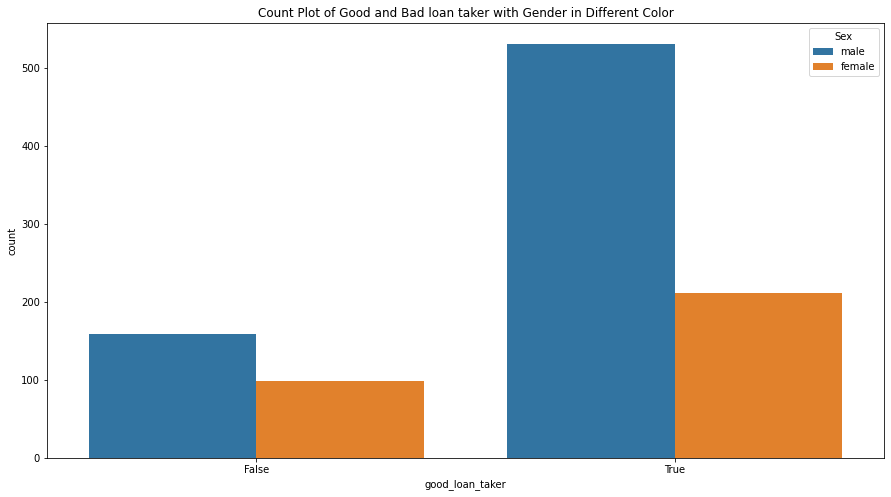

In [98]:
plt.figure(figsize = [15,8])
sns.countplot(data = loan_df,x = 'good_loan_taker',hue = 'Sex')
plt.title("Count Plot of Good and Bad loan taker with Gender in Different Color")
plt.show()

- The propotion of male to be a good loan taker is much greater than female

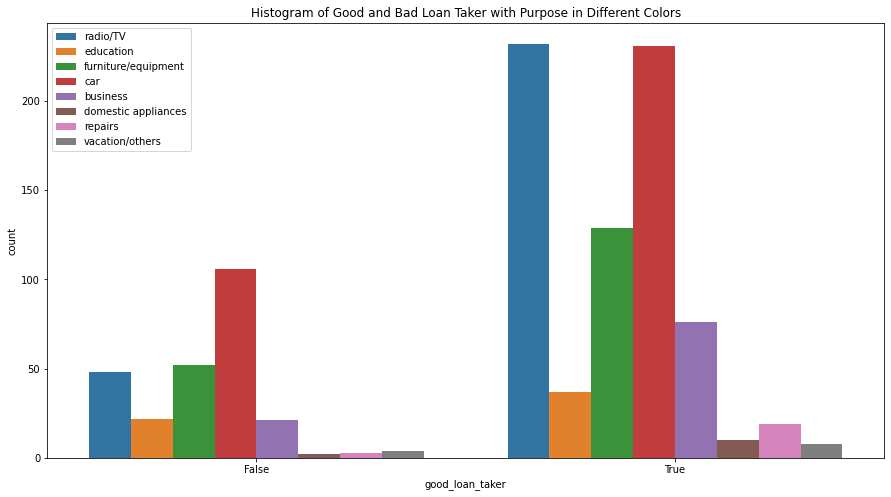

In [100]:
plt.figure(figsize = [15,8])
sns.countplot(data = loan_df,x = 'good_loan_taker',hue = 'Purpose')
plt.legend(loc=2, prop={'size': 10})
plt.title("Histogram of Good and Bad Loan Taker with Purpose in Different Colors")
plt.show()

- Those loans which the purpose are consumer goods, are more likely to be issued by good loan taker.

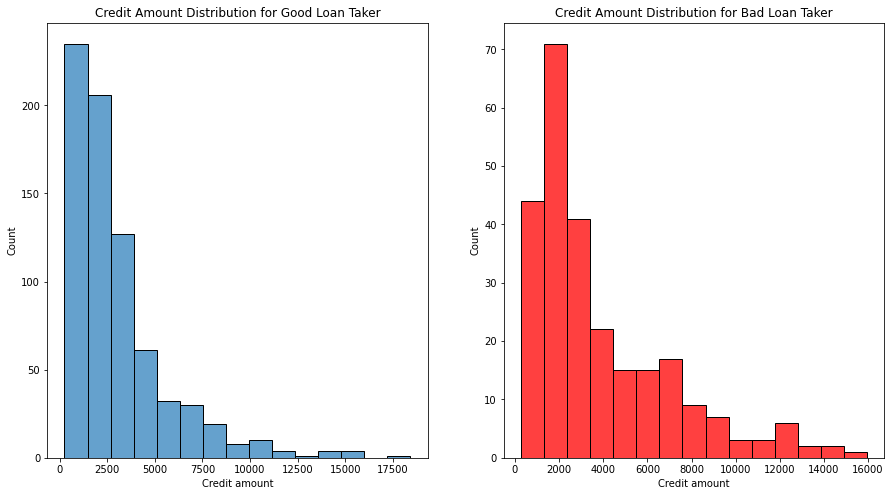

In [101]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = [15,8])
sns.histplot(data = loan_df[loan_df['good_loan_taker']==True],x = 'Credit amount',bins = 15,ax=ax1,color='#3182bd')
sns.histplot(data = loan_df[loan_df['good_loan_taker']==False],x = 'Credit amount',bins = 15,ax=ax2,color='red')
ax1.set_title("Credit Amount Distribution for Good Loan Taker")
ax2.set_title("Credit Amount Distribution for Bad Loan Taker")
plt.show()

- Small amount of loan are more likely to be issued by good loan takers.